# Mobile price prediction - Linear Regression
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

## Context:
GSMArena Phones Dataset is a labeled dataset extracted from GSMArena, one of the most popular online provider of phone information, and holds a large collection of phone specification.

### Data Set - 

Domain: Telecom

Data: https://www.kaggle.com/arwinneil/gsmarena-phone-dataset

#### Features

1. brand
2. model
3. network_technology
4. 2G_bands
5. 3G_bands
6. 4G_bands
7. network_speed
8. GPRS
9. EDGE
10. announced
11. status
12. dimentions
13. weight_g
14. weight_oz
15. SIM
16. display_type
17. display_resolution
18. display_size
19. OS
20. CPU
21. Chipset
22. GPU
23. memory_card
24. internal_memory
25. RAM
26. primary_camera
27. secondary_camera
28. loud_speaker
29. audio_jack
30. WLAN
31. bluetooth
32. GPS
33. NFC
34. radio
35. USB
36. sensors
37. battery
38. colors
39. approx_price_EUR
40. img_url

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

### Objective - 

To predict mobile phone price belonging to a specific brand depending on the available features


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

### Steps to perform:

#### 1. Import Libraries
#### 2. Import Data set and exploration
#### 3. Data Cleansing
#### 4. Data Preparation
#### 5. Data Validation
#### 6. EDA
#### 7. Data Split - Train : Test
#### 8. Supervised Learning modeling: Linear Regression
#### 9. Model Testing: Linear Regression
#### 10. Future data prediction

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


### 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings('ignore')

### 2. Reading Dataset and Exploration ( report shape of the dataset)

In [2]:
df = pd.read_csv("/Users/sanidhyavishnoi/Study_GL/lab/r3/mobile_price.csv")
df.shape

(8628, 40)

#### Check a few sample of the dataframe and get familiar with the data

In [3]:
df.sample(10)

,brand,model,network_technology,2G_bands,3G_bands,4G_bands,network_speed,GPRS,EDGE,announced,...,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,approx_price_EUR,img_url
3287,LG,SU920,GSM,GSM 850 / 900 / 1800 / 1900,TD-SCDMA,NaN,TD-SCDMA,Class 10,Class 10,2010 April. Released 2010 July,...,2.1/ A2DP,No,NaN,No,microUSB 2.0,Accelerometer,Removable Li-Ion 900 mAh battery,Black/ White/ Pink,NaN,http://cdn2.gsmarena.com/vv/bigpic/lg-su920.jpg
7533,Sony Ericsson,K750,GSM,GSM 900 / 1800 / 1900,NaN,NaN,NaN,Class 10,No,2005 1Q,...,2,No,NaN,Stereo FM radio/ RDS,Yes,NaN,Removable Li-Po 900 mAh battery (BST-36),Black/ Silver,140,http://cdn2.gsmarena.com/vv/bigpic/sonyericsso...
2224,Huawei,Y3 (2017),GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2,HSDPA 850 / 900 / 1900 / 2100,LTE,HSPA LTE,Yes,Yes,2017 May,...,4.0/ A2DP,Yes with A-GPS,NaN,FM radio,microUSB 2.0,Accelerometer/ proximity,Removable Li-Ion 2200 mAh battery,Gold/ Pink/ Blue/ White/ Gray,NaN,http://cdn2.gsmarena.com/vv/bigpic/huawei-y3-2...
8595,ZTE,Sage,GSM,GSM 900 / 1800,NaN,NaN,NaN,Yes,No,2010. Released 2010,...,Yes,No,NaN,Stereo FM radio,Yes,NaN,Removable Li-Ion battery,Black,NaN,http://cdn2.gsmarena.com/vv/bigpic/zte-sage-or...
2238,Huawei,Fit,No cellular connectivity,NA,NaN,NaN,NaN,No,No,2016 November,...,4.2/ LE,No,NaN,No,No,Accelerometer/ gyro/ heart rate,Non-removable Li-Ion 80 mAh battery,Titanium Gray/ Moonlight Silver/ Orange,200,http://cdn2.gsmarena.com/vv/bigpic/huawei-fit.jpg
5145,Palm,Pre 2,GSM / HSPA,GSM 850 / 900 / 1800 / 1900,HSDPA 850 / 1900,NaN,HSPA 7.2/2 Mbps,Yes,Yes,2010 October. Released 2010 November,...,2.1/ A2DP/ EDR,Yes with A-GPS,NaN,NaN,microUSB 2.0,Accelerometer/ proximity,Removable Li-Ion battery,Black,260,http://cdn2.gsmarena.com/vv/bigpic/palm-pre-2-...
3000,LG,V20,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (d...,HSDPA 850 / 900 / 1700(AWS) / 1900 / 2100,LTE band 1(2100)/ 2(1900)/ 3(1800)/ 4(1700/210...,HSPA 42.2/5.76 Mbps LTE-A Cat6 Cat9 (3CA) or...,Class 33,Class 33,2016 September,...,4.2/ A2DP/ LE/ aptX,Yes with A-GPS GLONASS,Yes,FM radio/ RDS (market dependent),2.0/ Type-C 1.0 reversible connector,Fingerprint (rear-mounted)/ accelerometer/ gyr...,Removable Li-Ion 3200 mAh battery,Titan/ Silver/ Pink,560,http://cdn2.gsmarena.com/vv/bigpic/lg-v20-ofic...
343,alcatel,OT-303,GSM,GSM 900 / 1800,NaN,NaN,NaN,Class 10,No,2009 March. Released 2009,...,No,No,NaN,FM radio/ RDS,miniUSB 1.1,NaN,Removable Li-Ion 650 mAh battery,Titanium Grey/ Cherry Red & Turquoise,NaN,http://cdn2.gsmarena.com/vv/bigpic/alcatel-303...
763,Asus,Zenfone 2 Laser ZE601KL,GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2,HSDPA 850 / 900 / 1900 / 2100 - TW/WW version,LTE band 1(2100)/ 2(1900)/ 3(1800)/ 5(850)/ 6(...,HSPA 42.2/5.76 Mbps LTE Cat4 150/50 Mbps,Yes,Yes,2015 August,...,4.1/ A2DP/ EDR,Yes with A-GPS GLONASS BDS,NaN,FM radio,microUSB 2.0,Accelerometer/ gyro/ proximity/ compass,Removable Li-Po 3000 mAh battery,Glacier Gray/ Sheer Gold/ Glamour Red,300,http://cdn2.gsmarena.com/vv/bigpic/asus-zenfon...
8609,ZTE,F951,GSM / HSPA,GSM 850 / 900 / 1800 / 1900,HSDPA 850 / 1900 / 2100,NaN,HSPA 3.6/0.384 Mbps,Class 10,Class 10,2010. Released 2010,...,2.1/ A2DP,A-GPS only,NaN,Stereo FM radio/ RDS,2,Accelerometer,Removable Li-Ion 1250 mAh battery,Black,NaN,http://cdn2.gsmarena.com/vv/bigpic/ZTE-U-F951.jpg


#### Check info of the dataframe and comment on datatype of various features

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8628 entries, 0 to 8627
Data columns (total 40 columns):
brand                 8628 non-null object
model                 8628 non-null object
network_technology    8628 non-null object
2G_bands              8628 non-null object
3G_bands              4857 non-null object
4G_bands              1604 non-null object
network_speed         4884 non-null object
GPRS                  8596 non-null object
EDGE                  8605 non-null object
announced             8613 non-null object
status                8628 non-null object
dimentions            8609 non-null object
weight_g              7680 non-null object
weight_oz             7680 non-null object
SIM                   8626 non-null object
display_type          8624 non-null object
display_resolution    7414 non-null object
display_size          8581 non-null object
OS                    4905 non-null object
CPU                   4835 non-null object
Chipset               3691 non-nu

- There are few columns which are having many null values like 4g_Bands,NFC. We can Drop them.
- All the columns have Datatype as Object, we will encode them as Datatype which can help in modelling.

#### Check statistical summary of the dataset and comment on your findings

In [5]:
df.describe()

,brand,model,network_technology,2G_bands,3G_bands,4G_bands,network_speed,GPRS,EDGE,announced,...,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,approx_price_EUR,img_url
count,8628,8628,8628,8628,4857,1604,4884,8596,8605,8613,...,8610,8600,793,8535,7725,4588,8626,8026,5004,8628
unique,108,8274,38,209,579,650,195,53,51,711,...,110,95,50,97,101,114,1049,2611,110,8346
top,Samsung,X500,GSM,GSM 850 / 900 / 1800 / 1900,HSDPA 900 / 2100,LTE,HSPA 21.1/5.76 Mbps,Yes,Yes,2005 1Q,...,No,No,Yes,No,microUSB 2.0,Accelerometer/ proximity,Removable Li-Ion battery,Black,70,http://cdn2.gsmarena.com/vv/bigpic/htc-one-m8.jpg
freq,1103,5,3505,2255,1115,173,751,3547,3242,151,...,1612,4085,668,3490,3397,1138,719,2022,302,5


- We can infer that battery and color columns don't have much effect on our taget variable and can influence our target variable in many aspects so it will be better to drop them.
- Columns like brand,network_technology,GPS,USB can be used by doing some encoding.

#### Univariate Analysis 


#### 1. Check frequency distribution of 'brand' and comment yuor findings

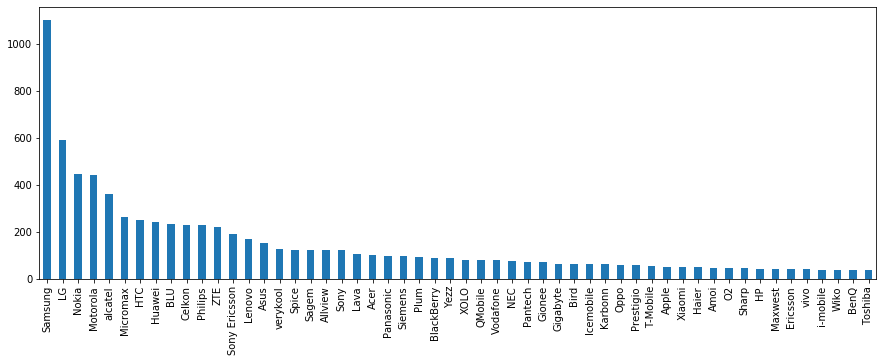

In [7]:
bdf = df['brand'].value_counts()
bdf[:54].plot(kind = 'bar', figsize =(15,5))

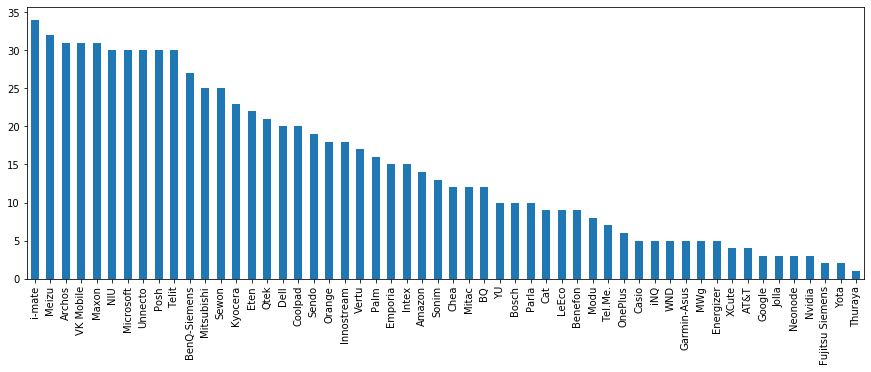

In [8]:
bdf = df['brand'].value_counts()
bdf[54:].plot(kind = 'bar', figsize =(15,5))

- Top Brands are Samsung, LG, Nokia.
- Half of the brands have frequency count less than 35.

#### 2. Check distribution of 'approx_price_EUR' column. Check the presence of invalid values and impute it

In [22]:
df['approx_price_EUR'].value_counts().head(10)

70     302
100    278
80     264
120    246
150    241
90     240
110    218
130    214
60     183
50     179
Name: approx_price_EUR, dtype: int64

In [14]:
df[df['approx_price_EUR'] == 'Black']

,brand,model,network_technology,2G_bands,3G_bands,4G_bands,network_speed,GPRS,EDGE,announced,...,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,approx_price_EUR,img_url
819,Asus,Google Nexus 7 (2013),GSM / HSPA / LTE,GSM 850 / 900 / 1800 / 1900 - all versions,HSDPA 850 / 900 / 1700 / 1900 / 2100,LTE band 1(2100)/ 2(1900)/ 3(1800)/ 4(1700/210...,HSPA LTE,Yes,Yes,2013 July,...,Wi-Fi 802.11 a/b/g/n/ dual-band,4.0/ A2DP/ LE,Yes with A-GPS,Yes,No,microUSB 2.0 (SlimPort),Accelerometer/ gyro/ proximity/ compass,Non-removable Li-Ion 3950 mAh battery,Black,http://cdn2.gsmarena.com/vv/bigpic/asus-google...


In [24]:
df_copy = df[df['approx_price_EUR'] != 'Black']

In [25]:
df_copy[df_copy['approx_price_EUR'] == 'Black']

,brand,model,network_technology,2G_bands,3G_bands,4G_bands,network_speed,GPRS,EDGE,announced,...,bluetooth,GPS,NFC,radio,USB,sensors,battery,colors,approx_price_EUR,img_url


In [26]:
df_copy.shape

(8627, 40)

### 3. Data Cleansing

#### Select instances having brand as 'Samsung' and report the final shape of the dataset

In [27]:
df_copy = df_copy[df_copy['brand'] == 'Samsung']
df_copy.shape

(1103, 40)

#### Check for missing values and drop the columns having more tahn 30% os missing values. And impute the remaining columns with their mode value

In [28]:
drop_col = df_copy.columns[df_copy.isnull().sum() /len(df_copy) > 0.3]
drop_col

Index(['3G_bands', '4G_bands', 'network_speed', 'OS', 'CPU', 'Chipset', 'GPU',
       'RAM', 'NFC', 'sensors'],
      dtype='object')

In [29]:
df_s = df_copy.drop(drop_col, axis = 1)
df_s = df_s[~df_s['approx_price_EUR'].isnull()]
df_s.shape

(870, 30)

In [30]:
for i in df_s.columns:
    if df_s[i].isnull().any():
        df_s[i] = df_s[i].fillna(df_s[i].mode()[0])

In [31]:
df_s.isnull().sum()

brand                 0
model                 0
network_technology    0
2G_bands              0
GPRS                  0
EDGE                  0
announced             0
status                0
dimentions            0
weight_g              0
weight_oz             0
SIM                   0
display_type          0
display_resolution    0
display_size          0
memory_card           0
internal_memory       0
primary_camera        0
secondary_camera      0
loud_speaker          0
audio_jack            0
WLAN                  0
bluetooth             0
GPS                   0
radio                 0
USB                   0
battery               0
colors                0
approx_price_EUR      0
img_url               0
dtype: int64

#### Report the final shape of the dataset

In [32]:
print("Shape :", df_s.shape)
print("\nColumns : \n\n", df_s.columns)

Shape : (870, 30)

Columns : 

 Index(['brand', 'model', 'network_technology', '2G_bands', 'GPRS', 'EDGE',
       'announced', 'status', 'dimentions', 'weight_g', 'weight_oz', 'SIM',
       'display_type', 'display_resolution', 'display_size', 'memory_card',
       'internal_memory', 'primary_camera', 'secondary_camera', 'loud_speaker',
       'audio_jack', 'WLAN', 'bluetooth', 'GPS', 'radio', 'USB', 'battery',
       'colors', 'approx_price_EUR', 'img_url'],
      dtype='object')


#### Let's select a few important columns for model building. We will encode 'network_technology', 'GPS', 'USB', 'primary_camera', 'display_resolution', 'internal_memory' and use 'approx_price_EUR' as target columns.

We will do the following encoding and check final frequency counts

In [33]:
new_df = df_s[['network_technology','GPS','USB','primary_camera',
               'display_resolution','internal_memory','approx_price_EUR']]
new_df.head()

,network_technology,GPS,USB,primary_camera,display_resolution,internal_memory,approx_price_EUR
5962,GSM / HSPA / LTE,Yes with A-GPS GLONASS,microUSB 2.0/ USB On-The-Go,13 MP/ f/1.7/ autofocus/ LED flash,5.7 inches (~72.5% screen-to-body ratio),32 GB,250
5963,GSM / HSPA / LTE,Yes with A-GPS GLONASS,microUSB 2.0/ USB On-The-Go,13 MP/ f/1.7/ autofocus/ LED flash,5.5 inches (~73.3% screen-to-body ratio),64 GB,300
5964,GSM / HSPA / LTE,Yes with A-GPS GLONASS BDS,microUSB 2.0,13 MP/ f/1.7/ autofocus/ LED flash,5.5 inches (~73.3% screen-to-body ratio),16 GB,340
5965,GSM / HSPA / LTE,Yes with A-GPS GLONASS BDS,microUSB 2.0,13 MP/ f/1.7/ autofocus/ LED flash,5.2 inches (~71.5% screen-to-body ratio),16 GB,280
5966,GSM / HSPA / LTE,Yes with A-GPS GLONASS BDS,microUSB 2.0/ USB On-The-Go,13 MP/ f/1.9/ autofocus/ LED flash,5.0 inches (~68.5% screen-to-body ratio),16 GB,220


#### Encode 'GPS', 'USB' column into two categories (whether GPS/USB is YES or NO)

In [34]:
new_df['GPS'].value_counts()

No                                                369
Yes with A-GPS                                    203
Yes with A-GPS GLONASS                            166
Yes with A-GPS GLONASS BDS                         38
Yes                                                22
Yes with GLONASS                                   13
A-GPS only; AT&T Navigator                          7
Yes with A-GPS GLONASS/ BDS (market dependant)      7
Yes with A-GPS GLONASS/ BDS (region dependent)      6
Yes with A-GPS Samsung Mobile Navigator             4
Yes with A-GPS GLONASS BDS GALILEO                  4
A-GPS only; Google Maps                             3
A-GPS only; VZ Navigator                            3
Yes with A-GPS Bing map                             2
Yes with S-GPS; GLONASS                             2
Yes GLONASS                                         2
Yes GLONASS BDS                                     2
Yes; GLONASS                                        2
Yes with A-GPS; MetroNavigat

In [35]:
for x in range(len(new_df['GPS'])):
    if new_df['GPS'].iloc[x] == 'No':
        new_df['GPS'].iloc[x] = 0
    else:
        new_df['GPS'].iloc[x] = 1

In [36]:
new_df['GPS'].value_counts()

1    501
0    369
Name: GPS, dtype: int64

In [37]:
new_df['USB'].value_counts()

microUSB 2.0                                                393
2                                                           185
Yes                                                          67
No                                                           43
microUSB 2.0 (MHL TV-out)/ USB Host                          32
microUSB 2.0/ USB Host                                       23
1.1                                                          20
microUSB 2.0/ USB On-The-Go                                  19
microUSB                                                     10
microUSB 2.0 (MHL 2 TV-out)/ USB Host                         9
microUSB 2.0 (MHL TV-out)                                     9
microUSB 3.0 (MHL 2.1 TV-out)/ USB Host                       7
2.0/ USB Host                                                 6
2.0 (TV-out)                                                  4
2.0/ Type-C 1.0 reversible connector                          4
3.1/ Type-C 1.0 reversible connector    

In [38]:
for x in range(len(new_df['USB'])):
    if new_df['USB'].iloc[x] == 'No':
        new_df['USB'].iloc[x] = 0
    else:
        new_df['USB'].iloc[x] = 1

In [39]:
new_df['USB'].value_counts()

1    827
0     43
Name: USB, dtype: int64

#### Encode "network_technology". Create two categories one having value as "No cellular connectivity " and another having all otrher types of connectivity

In [40]:
new_df['network_technology'].value_counts()

GSM / HSPA                        277
GSM                               265
GSM / HSPA / LTE                  155
CDMA / EVDO                        43
No cellular connectivity           36
GSM / UMTS                         28
GSM / CDMA / HSPA / EVDO / LTE     16
CDMA / EVDO / LTE                  15
CDMA / CDMA2000                    10
CDMA                                8
GSM / CDMA / EVDO                   4
GSM / CDMA / HSPA / LTE             3
GSM / CDMA                          3
HSPA / LTE                          2
GSM / UMTS / HSPA / LTE             1
HSPA                                1
CDMA / HSPA / EVDO / LTE            1
CDMA / HSPA / EVDO                  1
GSM / CDMA / UMTS / EVDO            1
Name: network_technology, dtype: int64

In [41]:
for x in range(len(new_df['network_technology'])):
    if new_df['network_technology'].iloc[x] == 'No cellular connectivity':
        new_df['network_technology'].iloc[x] = 0
    else:
        new_df['network_technology'].iloc[x] = 1

In [42]:
new_df['network_technology'].value_counts()

1    834
0     36
Name: network_technology, dtype: int64

#### Encode "display_resolution". Find the resolution number using regex

In [43]:
import re
for i in range(len(new_df['display_resolution'])):
    txt=new_df['display_resolution'].iloc[i]
    x = re.findall("\d+\.*\d*", txt)
    new_df['display_resolution'].iloc[i]=x[0]

In [44]:
new_df['display_resolution']=new_df['display_resolution'].astype(float)
new_df['display_resolution'].head()

5962    5.7
5963    5.5
5964    5.5
5965    5.2
5966    5.0
Name: display_resolution, dtype: float64

#### Encode "internal_memory". Create two categories having values in MB, or GB using regex

Hint - 
mb = re.search('MB',txt)
    if mb:
        X['internal_memory'].iloc[i]=1
    else:
        X['internal_memory'].iloc[i]=0

In [45]:
for i in range(len(new_df['internal_memory'])):
    txt = str(new_df['internal_memory'].iloc[i])
    
    x = re.search('GB',txt)
    if x :
        new_df['internal_memory'].iloc[i] = 1
    else :
        new_df['internal_memory'].iloc[i] = 0

In [46]:
new_df['internal_memory'].value_counts()

1    477
0    393
Name: internal_memory, dtype: int64

#### Encode "primary_camera". Create 2-3 categories having no camera, camera in M, or VGA using regex

In [47]:
new_df['primary_camera'].value_counts()

2 MP                                                                   187
5 MP/ autofocus/ LED flash                                              84
1.3 MP                                                                  83
3.15 MP                                                                 75
VGA                                                                     56
                                                                      ... 
13 MP/ f/2.1/ 27mm/ autofocus/ LED flash/                                1
5 MP/ f/2.2/ autofocus/ LED flash/                                       1
16 MP/ f/1.9/ autofocus/ LED flash                                       1
12 MP/ f/2.2/ 31mm/ phase detection autofocus/ LED flash                 1
16 MP/ f/1.9/ phase detection autofocus/ dual-LED (dual tone) flash      1
Name: primary_camera, Length: 104, dtype: int64

In [48]:
for i in range(len(new_df['primary_camera'])):
    txt = str(new_df['primary_camera'].iloc[i])
    
    x = re.search('MP',txt)
    y = re.search('VGA',txt)
    if x :
        new_df['primary_camera'].iloc[i] = 1
    elif y :
        new_df['primary_camera'].iloc[i] = 0
    else :
        new_df['primary_camera'].iloc[i] = 2

In [49]:
new_df['primary_camera'].value_counts()

1    811
0     59
Name: primary_camera, dtype: int64

In [50]:
new_df.dtypes

network_technology      int64
GPS                     int64
USB                     int64
primary_camera          int64
display_resolution    float64
internal_memory         int64
approx_price_EUR       object
dtype: object

In [51]:
convert_dict = {'approx_price_EUR' : int}
new_df = new_df.astype(convert_dict)
new_df.dtypes

network_technology      int64
GPS                     int64
USB                     int64
primary_camera          int64
display_resolution    float64
internal_memory         int64
approx_price_EUR        int64
dtype: object

### 4. Data Preparation

Segregate X and y

In [52]:
new_df.head(5)

,network_technology,GPS,USB,primary_camera,display_resolution,internal_memory,approx_price_EUR
5962,1,1,1,1,5.7,1,250
5963,1,1,1,1,5.5,1,300
5964,1,1,1,1,5.5,1,340
5965,1,1,1,1,5.2,1,280
5966,1,1,1,1,5.0,1,220


In [53]:
y = new_df['approx_price_EUR']
X = new_df.drop(['approx_price_EUR'], axis =1)

### 5. EDA

#### Perform univariate analysis by checking frequency distribution of all the features

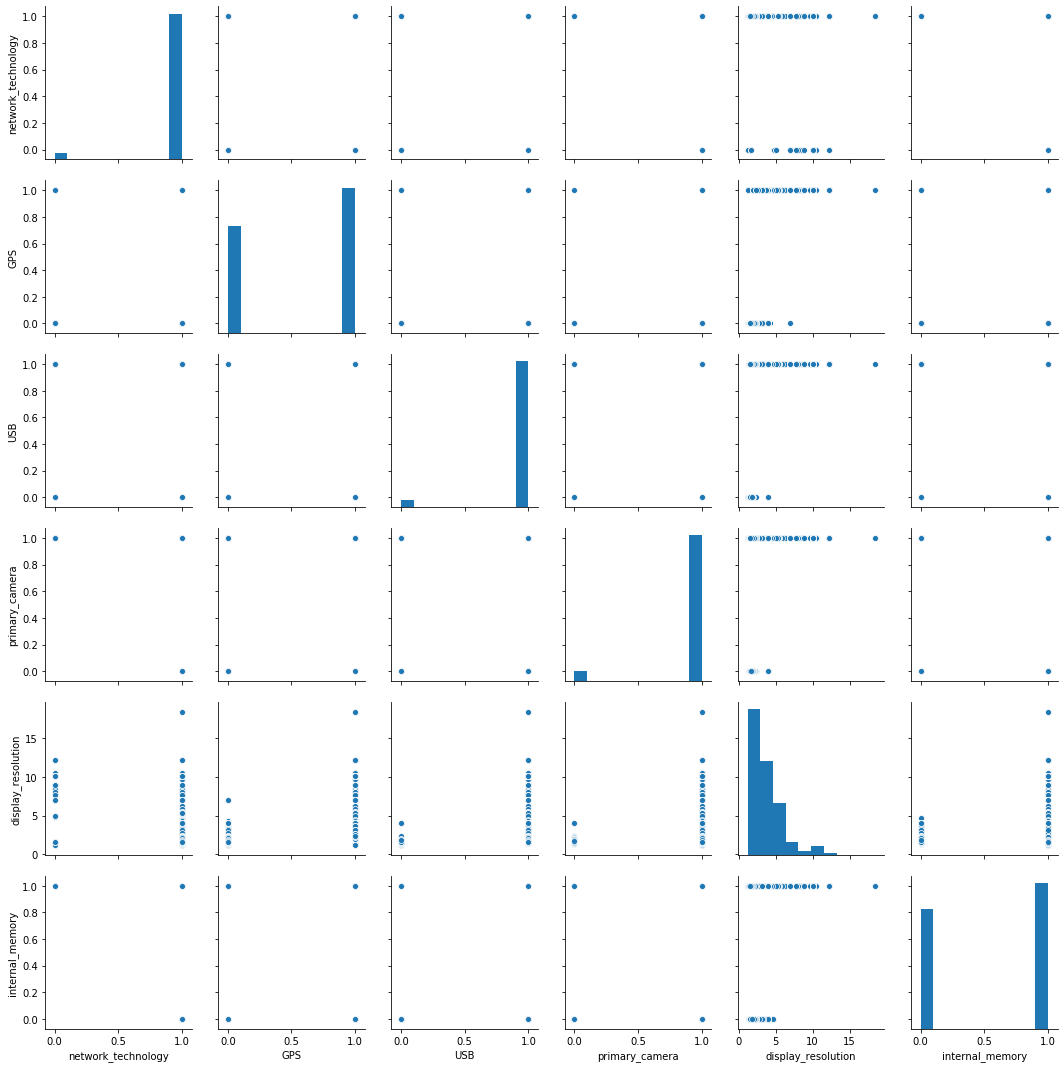

In [54]:
sns.pairplot(X)

#### Perform bivariate analysis by checking doing crosstab between independent and dependent features

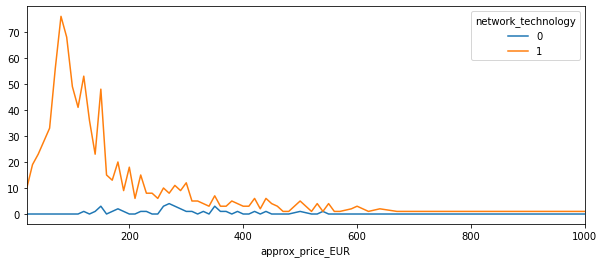

In [55]:
pd.crosstab(y,X['network_technology']).plot(figsize = (10,4))

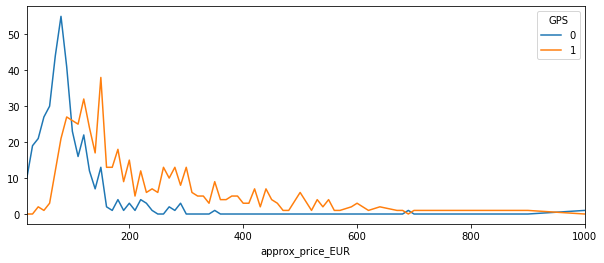

In [42]:
pd.crosstab(y,X['GPS']).plot(figsize = (10,4))

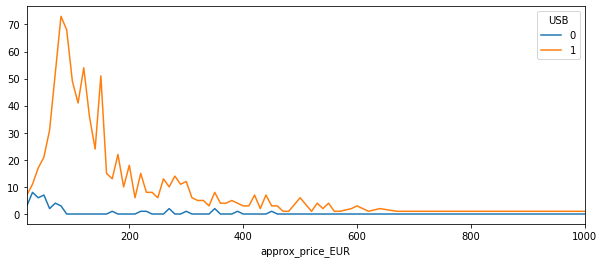

In [43]:
pd.crosstab(y,X['USB']).plot(figsize = (10,4))

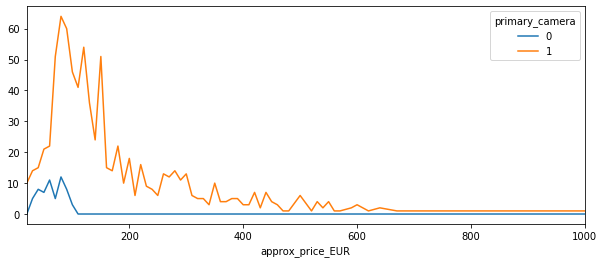

In [44]:
pd.crosstab(y,X['primary_camera']).plot(figsize = (10,4))

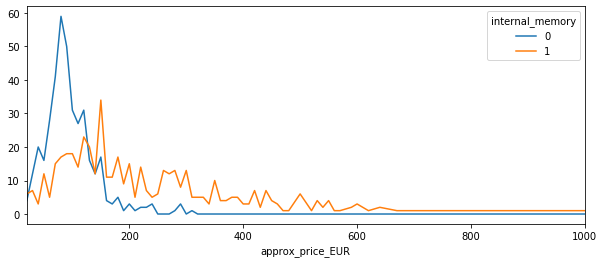

In [45]:
pd.crosstab(y,X['internal_memory']).plot(figsize = (10,4))

### 6. Split data into Train and Test set and build a Supervised Learning model using Linear Regression

In [46]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state = 10)

In [47]:
model = LinearRegression()
model.fit(X_train,y_train)
print("Training Set Score :" ,model.score(X_train,y_train))

Training Set Score : 0.4424460497198074


In [48]:
print("Test Set Score :" ,model.score(X_test,y_test))

Test Set Score : 0.42741995039038405


### 7. Train a KNN model and check its performance

In [49]:
knn = KNeighborsRegressor(n_neighbors=8)
knn.fit(X_train,y_train)
print("Training Set Score :" ,knn.score(X_train,y_train))

Training Set Score : 0.6803125220911279


In [50]:
print("Test Set Score :" ,knn.score(X_test,y_test))

Test Set Score : 0.7214711918404735


                                     End of case study